In [3]:
from song import read
from song import spectral
from song import utils
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from scipy.ndimage import maximum_filter
from scipy.ndimage import minimum_filter
from scipy.ndimage import maximum_filter1d
from scipy.ndimage.filters import uniform_filter1d
from song import midi_tools
%matplotlib inline
from song.utils import freq_to_bucket

In [4]:
sr, song = read.read('../Songs/fur_elise.wav')
# sr, song = read.read('../Songs/deadmau5.wav')
# sr, song = read.read('../Songs/ree.wav')
# sr, song = read.read('../Songs/river_flows_in_you.wav')
# song = song/np.max(song)
# sr, song = read.read('../Songs/fur_elise.wav')
song = song[:sr*5]

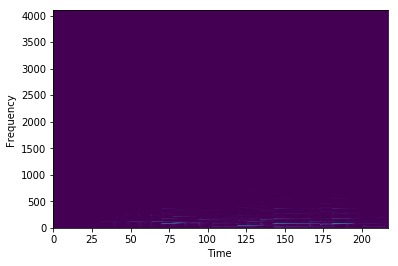

In [21]:
_, _, x = signal.stft(song, nperseg=2048, nfft=8192) 
x = abs(x)
# x = utils.log_compression(x)
# plt.plot(windowed)
plt.ylabel('Frequency ')
plt.xlabel('Time ')
plt.pcolormesh(x)
plt.savefig("spec_no_log", quality="95")
plt.show()

In [81]:
def normalize(frame):
    return frame/np.max(frame)

In [5]:
def log_spec(spect, bins=128):
    # TODO: help, wont use this for now but will come back to it
    song_length = len(spect[0])
    new_full = np.zeros(shape=(bins, song_length))
    for frame in range(1, len(spect.T)):
        # peaks, _ = signal.find_peaks(spect[:, frame], prominence=5)
        avg = uniform_filter1d(abs(spect[:, frame]), 100)
        peaks, _ = signal.find_peaks(abs(spect[:, frame]), height=avg, prominence=5)
        # peaks, _ = signal.find_peaks(abs(spect[:, frame]), height=np.mean(abs(spect[:, frame])), prominence=avg)
        # peaks, _ = signal.find_peaks(abs(spect[:, frame]))
        for peak in peaks:
#             offset = np.angle(spect[peak, frame] - spect[peak, frame-1] - (((2 * np.pi * 256) / 8192) * frame)) * (8192 / (2 * np.pi * 256))
#             print("Peak:", peak, "Offset:", offset)
            if freq_to_bucket(peak) >= 128:
                break
            new_full[freq_to_bucket(peak), frame] += abs(spect[peak, frame])
    return new_full

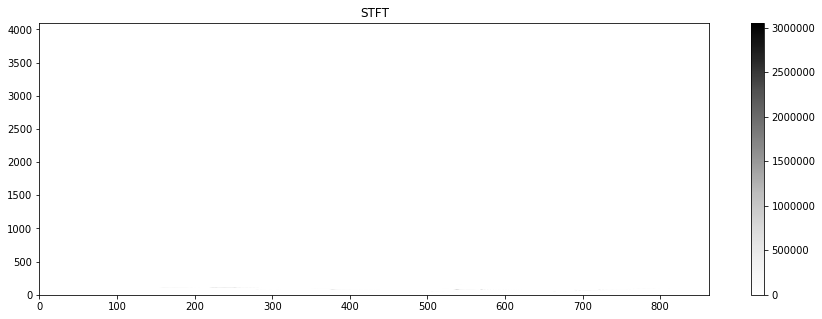

In [11]:
_, _, x = signal.stft(song, nperseg=2048, nfft=8192, noverlap=1792)  # 1792/1920
plt.figure(figsize=(15, 5))
x, _ = utils.magphase(x)
# x = x **2
spectral.display(x)

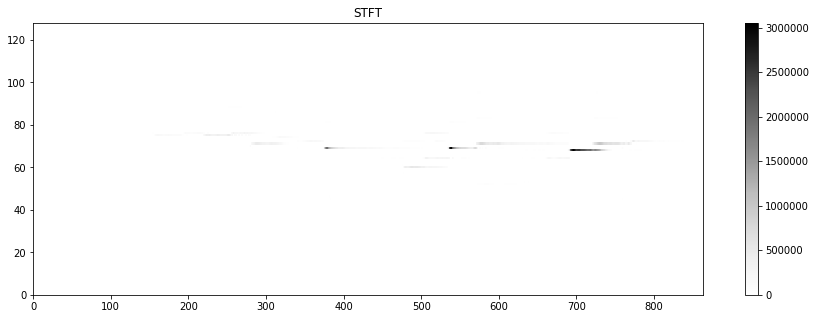

<Figure size 1080x360 with 0 Axes>

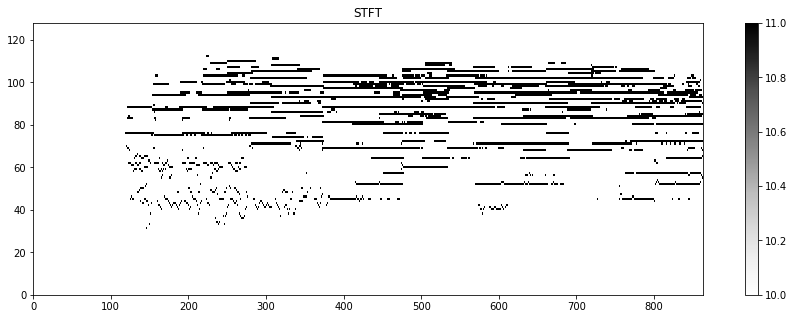

In [6]:
x = (np.abs(x))
log = log_spec(x)

plt.figure(figsize=(15, 5))
# x, _ = utils.magphase(x)

spectral.display(log)

plt.figure(figsize=(15, 5))
# spectral.display((log>np.mean(log)).astype(int))
plt.figure(figsize=(15, 5))
spectral.display((log>0).astype(int)+10)

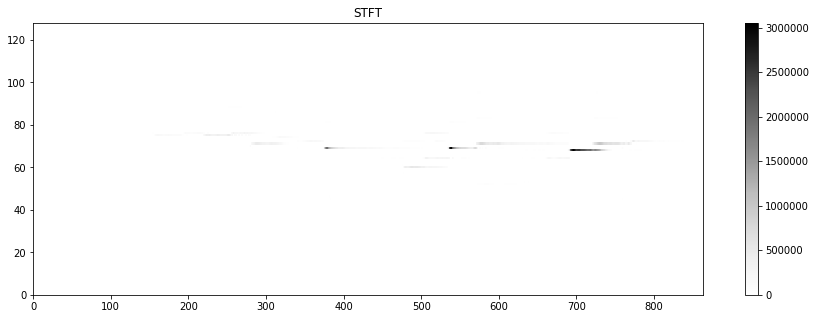

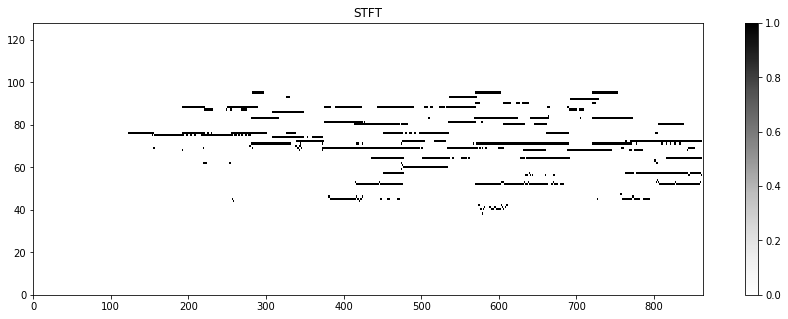

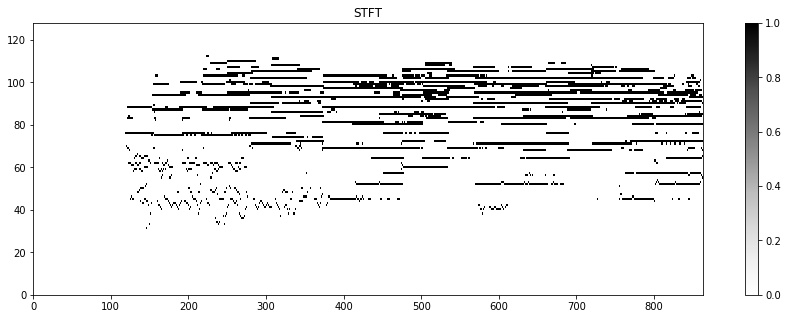

In [7]:
log = log_spec(x)

plt.figure(figsize=(15, 5))
# x, _ = utils.magphase(x)
spectral.display(log)

plt.figure(figsize=(15, 5))
spectral.display((log>np.mean(log)).astype(int))
plt.figure(figsize=(15, 5))
spectral.display((log>0).astype(int))

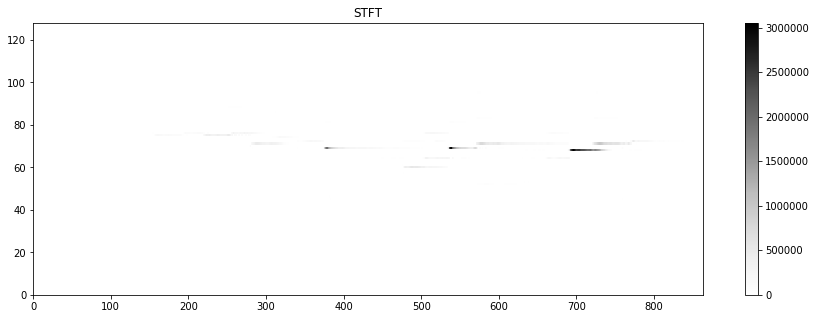

In [8]:
log = log_spec(x.copy())

plt.figure(figsize=(15, 5))
# x, _ = utils.magphase(x)
spectral.display(log)

11


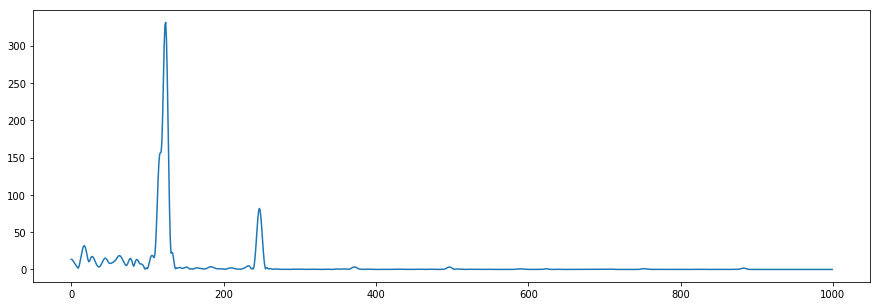

In [10]:
frame = np.abs(x[:, 200])
plt.figure(figsize=(15, 5))
plt.plot(frame[:1000])
avg = uniform_filter1d(frame, 1000)
maxi = maximum_filter(frame, 30)
peaks, _ = signal.find_peaks(frame, height=maxi, prominence=np.mean(frame))
# plt.plot(avg)
# plt.plot(maxi)
# plt.plot(peaks, frame[peaks], "x", color="red")
print(len(peaks))

14


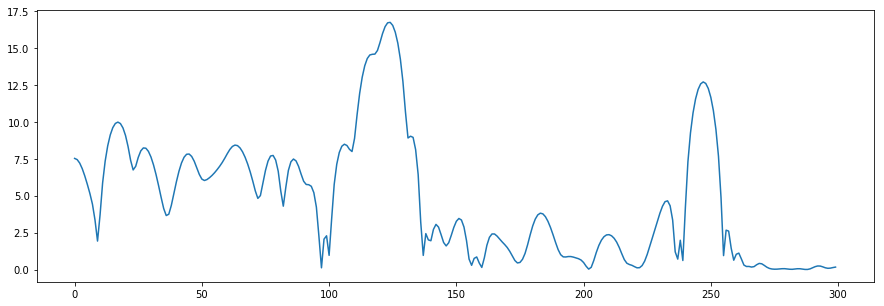

In [14]:
frame = np.abs(x[:, 200])
frame = np.log2(1+frame)
plt.figure(figsize=(15, 5))
plt.plot(frame[:300])
avg = uniform_filter1d(frame, 1000)
maxi = maximum_filter(frame, 30)
peaks, _ = signal.find_peaks(frame, height=maxi, prominence=np.mean(frame))
# plt.plot(avg)
# plt.plot(maxi)
# plt.plot(peaks, frame[peaks], "x", color="red")
print(len(peaks))

18


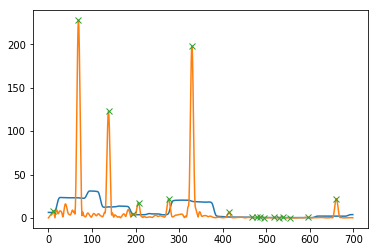

In [113]:
test = x[:, 50][:700]
# test = np.log(1 + test)
avg = uniform_filter1d(test, 100)
peaks, _ = signal.find_peaks(test, height=avg)
plt.plot(avg)
plt.plot(test)
print(len(peaks))
plt.plot(peaks,  test[peaks], "x")
# plt.plot(peaks, test[peaks], "x")
plt.show()

In [93]:
from math import floor, log2
freq  = 80 * (sr/8192)
floor((1200/100)*log2(freq/8.66)+1.5)

57

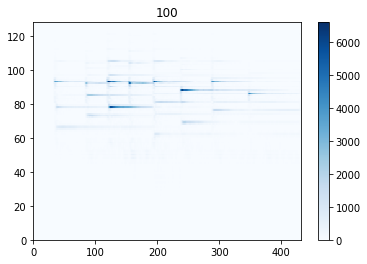

In [79]:
p = log_spec(x)
# spectral.display(utils.log_compression(p, 100), color="Blues")
spectral.display(p, 100, color="Blues")

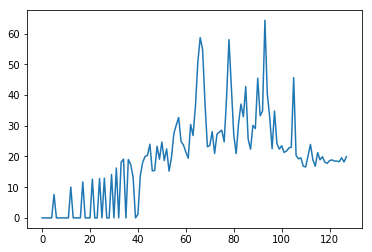

In [86]:
test = test[:, 50]
logged = utils.mag_to_db(1+logged)
plt.plot(logged)
plt.show()

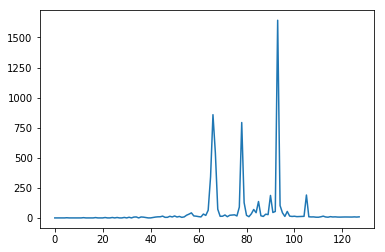

In [83]:
logged = p[:, 50]
# logged = utils.mag_to_db(1+logged)
plt.plot(logged)
plt.show()

63


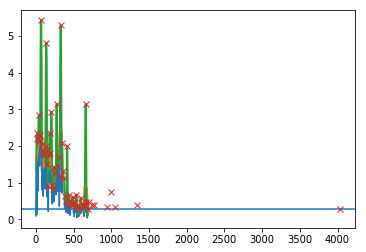

In [38]:
test = x[:, 50]
test = np.log(1 + test)
avg = uniform_filter1d(test, 50)
mmax = maximum_filter1d(test, 10)
peaks, _ = signal.find_peaks(test, height=np.mean(test))

plt.plot(test[:700])
plt.plot(avg[:700])
plt.plot(mmax[:700])
plt.axhline(y = np.mean(test))
print(len(peaks))
plt.plot(peaks, test[peaks], "x")
plt.show()

In [52]:
import matplotlib.cm
print(matplotlib.cm.cmap_d.keys())

dict_keys(['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'Greens_r', 'Greys_r', 'OrRd_r', 'Oranges_r', 'PRGn_r', 'PiYG_r', 'PuBu_r', 'PuBuGn_r', 'PuOr_r', 'PuRd_r', 'Purples_r', 'RdBu_r', 'RdGy_r', 'RdPu_r', 'RdYlBu_r', 'RdYlGn_r', 'Reds_r', 'Spectral

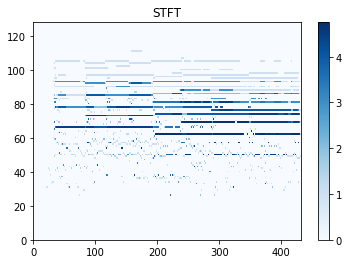

In [105]:
sal = spectral.salience(sal)
spectral.display(sal, color="Blues")

In [64]:
def non_zero_average_std(arr):
    nonz = np.nonzero(arr)[0]
    if nonz.any():
        return np.mean(arr[nonz]), np.std(arr[nonz])
    else:
        return 0, 0
def octave_weak(frame):
    for f in range(len(frame)-12):
        if frame[f] > 0:
            frame[f+12] *= 1/frame[f]

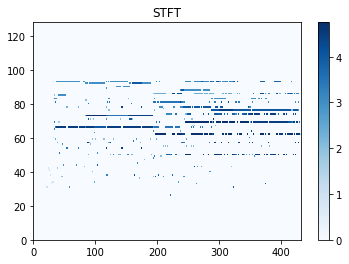

In [106]:
for frame in range(len(sal.T)):
    f = sal[:, frame]
    octave_weak(f)
    avg, sd = non_zero_average_std(f)
    f[f < avg] = 0
    sal[:, frame] = f
spectral.display(sal, color="Blues")

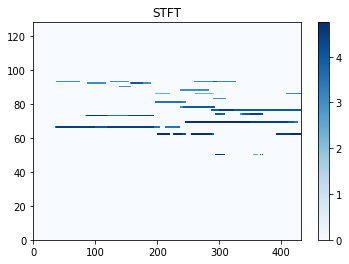

In [109]:
mask = median_filter(abs(sal), size=(1, 32))
mask[mask > 0] = 1
sal = mask * sal
sal = median_filter(abs(sal), size=(1, 16))
spectral.display(sal, color="Blues")
